In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import math
from datetime import datetime
import datetime as dt

a = pd.read_csv("/Users/clairehe/Desktop/bixi/OD_2017.csv", encoding="utf-8", low_memory = False)
station_2019 = pd.read_csv("/Users/clairehe/Desktop/bixi/Stations_2019.csv", encoding="utf-8", low_memory = False)
data_2019 = pd.read_csv("/Users/clairehe/Desktop/bixi/merged2019.csv", encoding="utf-8", low_memory = False)
data_2019['start_station_code'] = data_2019['start_station_code'].convert_objects(convert_numeric = True)
data_2019['start_station_code'] = data_2019['start_station_code'].fillna(0).astype(np.int64)

data_2019['end_station_code'] = data_2019['end_station_code'].convert_objects(convert_numeric = True)
data_2019['end_station_code'] = data_2019['end_station_code'].fillna(0).astype(np.int64)

data_2019['duration_sec'] = data_2019['duration_sec'].convert_objects(convert_numeric = True)
data_2019['duration_sec'] = data_2019['duration_sec'].fillna(0).astype(np.int64)

data_2019['is_member'] = data_2019['is_member'].convert_objects(convert_numeric = True)
data_2019['is_member'] = data_2019['is_member'].fillna(0).astype(np.int64)

#to compare the usage of each station, we must sort out the total duration time and the according counts
#first we sort out the total duration seconds with the first col start station code
sort_start_sec = pd.DataFrame(data_2019.groupby(by=['start_station_code'])['duration_sec'].sum())
sort_start_sec.columns = ['Total duration seconds']
sort_start_sec = sort_start_sec.sort_values(by = 'Total duration seconds', ascending=False)
#sort_start.head()

#then we sort out the total used time
sort_start_count = data_2019.groupby(by=['start_station_code'])['start_date'].agg({'Count': np.size})
sort_start_count['Count'] = sort_start_count.Count
sort_start_count = sort_start_count.sort_values(by = 'Count', ascending=False)
#sort_start_count.head()

sort_end_count = data_2019.groupby(by=['end_station_code'])['end_date'].agg({'Count': np.size})
sort_end_count['Count'] = sort_end_count.Count
sort_end_count = sort_end_count.sort_values(by = 'Count', ascending=False)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

The most used station is numbered: 6036 based on duration time and is numbered :6184 based on total used times


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


Text(0.5, 1.0, 'The Top20 used station to start at by counts in 2019')

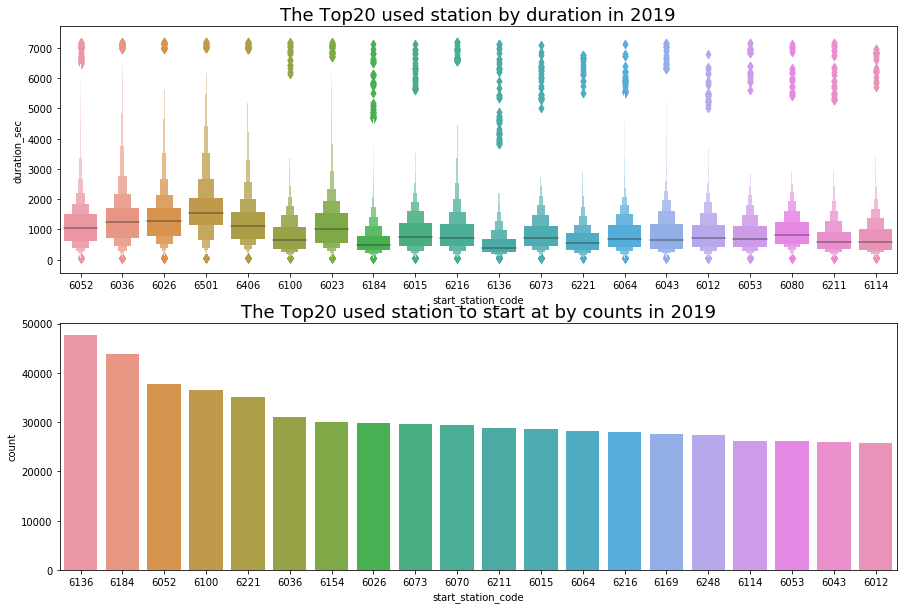

In [4]:
#we now try to investigate the TOP used station; 
#we first name out the most used station both through duration time and count times
#then we plot the TOP20 duration and TOP20 counts
most_used_station_s = sort_start_sec.index[1]   
most_used_station_c = sort_start_count.index[1]
print('The most used station is numbered: {} based on duration time and is numbered :{} based on total used times'.format(most_used_station_s,most_used_station_c))
#now we plot the TOP20 duration and TOP20 counts
f, axes = plt.subplots(2, 1, figsize=(15,10))
plt.sca(axes[0])
top = np.array(sort_start_sec.head(20).index)
topd = data_2019[data_2019['start_station_code'].isin(top)]
sb.lvplot(data=topd,x='start_station_code', y='duration_sec',order=top)
plt.title('The Top20 used station by duration in 2019', fontsize = 18)

plt.sca(axes[1])
top_data_s = np.array(sort_start_count.head(20).index)
topd_data_s = data_2019[data_2019['start_station_code'].isin(top_data_s)]
sb.countplot(data=topd_data_s,x='start_station_code',order=top_data_s)
plt.title('The Top20 used station to start at by counts in 2019', fontsize = 18)


In [5]:
#calculate the proportion of TOP20 stations to the total stations in Montreal
sum_top_data_s = np.array(sort_start_count.head(20).sum())
sum_top_data_e = np.array(sort_end_count.head(20).sum())
ratio = (sum_top_data_s + sum_top_data_e)/ data_2019.shape[0]
print('Sum of the top 20 stations rentals to start at: {}'.format(sum_top_data_s))
print('Sum of the top 20 stations rentals to end at: {}'.format(sum_top_data_e))
print('Sum of both start and end station rentals for top 20 stations: {}'.format(sum_top_data_s + sum_top_data_e))
print('This is {} of total rentals for 2019'.format(ratio))

Sum of the top 20 stations rentals to start at: [623121]
Sum of the top 20 stations rentals to end at: [708057]
Sum of both start and end station rentals for top 20 stations: [1331178]
This is [0.23777528] of total rentals for 2019


The leaset used station is numbered: 0 based on duration time and is numbered :7150 based on total used times


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


Text(0.5, 1.0, 'The 20 leaset used station to start at by counts in 2019')

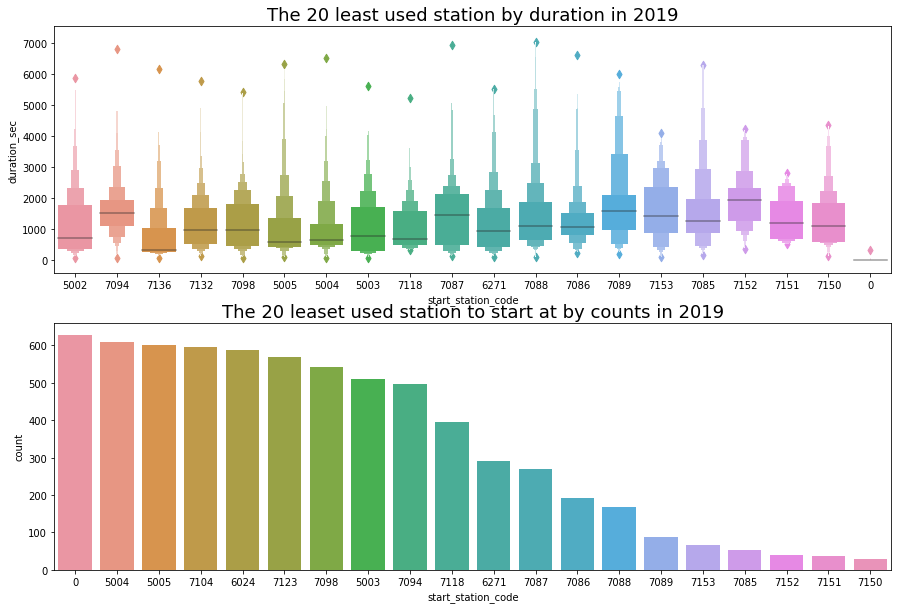

In [6]:
#we then try to find the least used station through two ways
least_used_station_s = sort_start_sec.index[-1]  
least_used_station_c = sort_start_count.index[-1]
print('The leaset used station is numbered: {} based on duration time and is numbered :{} based on total used times'.format(least_used_station_s,least_used_station_c))
#now we plot the least used station information
f, axes = plt.subplots(2, 1, figsize=(15,10))
plt.sca(axes[0])
l = np.array(sort_start_sec.tail(20).index)
ld = data_2019[data_2019['start_station_code'].isin(l)]
sb.lvplot(data=ld,x='start_station_code', y='duration_sec',order=l)
plt.title('The 20 least used station by duration in 2019', fontsize = 18)

plt.sca(axes[1])
l_data_s = np.array(sort_start_count.tail(20).index)
ld_data_s = data_2019[data_2019['start_station_code'].isin(l_data_s)]
sb.countplot(data=ld_data_s,x='start_station_code',order=l_data_s)
plt.title('The 20 leaset used station to start at by counts in 2019', fontsize = 18)


In [7]:
#calculate the proportion of TAIL20 stations to the total stations in Montreal
sum_l_data_s = np.array(sort_start_count.tail(20).sum())
sum_l_data_e = np.array(sort_end_count.tail(20).sum())
ratio2 = (sum_l_data_s + sum_l_data_e)/ data_2019.shape[0]
print('Sum of the least used 20 stations for rentals to start at: {}'.format(sum_l_data_s))
print('Sum of the least used 20 stations for rentals to end at: {}'.format(sum_l_data_e))
print('Sum of both start and end station rentals for least used 20 stations: {}'.format(sum_l_data_s + sum_l_data_e))
print('This is {} of total rentals for 2019'.format(ratio2))



Sum of the least used 20 stations for rentals to start at: [6771]
Sum of the least used 20 stations for rentals to end at: [6803]
Sum of both start and end station rentals for least used 20 stations: [13574]
This is [0.00242459] of total rentals for 2019


In [32]:
#now we start to invistigate the weather(temp;wind spead etc.) effect on number of trips 
from matplotlib import rcParams
import seaborn as sb
import math
from datetime import datetime
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
weather = pd.read_csv("/Users/clairehe/Desktop/bixi/climate2019.csv")
weather = weather.dropna(subset=['Weather'])
weather = weather.reset_index(drop=True)
avg_tem_hourly = weather.groupby('Date/Time')['Temp (°C)'].sum()
avg_wind_speed_hourly = weather.groupby('Date/Time')['Wind Spd (km/h)'].sum()
avg_visibility_hourly = weather.groupby('Date/Time')['Visibility (km)'].sum()

#2
data_2019 = pd.read_csv("/Users/clairehe/Desktop/bixi/merged2019.csv", encoding="utf-8", low_memory = False)
data_2019['start_station_code'] = data_2019['start_station_code'].convert_objects(convert_numeric = True)
data_2019['start_station_code'] = data_2019['start_station_code'].fillna(0).astype(np.int64)

data_2019['end_station_code'] = data_2019['end_station_code'].convert_objects(convert_numeric = True)
data_2019['end_station_code'] = data_2019['end_station_code'].fillna(0).astype(np.int64)

data_2019['duration_sec'] = data_2019['duration_sec'].convert_objects(convert_numeric = True)
data_2019['duration_sec'] = data_2019['duration_sec'].fillna(0).astype(np.int64)

data_2019['is_member'] = data_2019['is_member'].convert_objects(convert_numeric = True)
data_2019['is_member'] = data_2019['is_member'].fillna(0).astype(np.int64)

weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])
weather['Date/Time'] = weather['Date/Time'].fillna(method='ffill')
data_2019['start_date'] = pd.to_datetime(data_2019['start_date'], errors ='coerce' )
data_2019['start_date'] = data_2019['start_date'].fillna(method='ffill')
data_2019_weather = data_2019.sort_values(by=['start_date'])
data_2019_weather = pd.merge_asof(data_2019_weather, weather, left_on = 'start_date', right_on = 'Date/Time', direction = 'nearest').drop('Date/Time',axis=1)
data_2019_weather = data_2019_weather.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)

#plot the average frequency within a week
data_2019_weather['hour'] = data_2019_weather.start_date.dt.hour
data_2019_weather['weekday'] = data_2019_weather.start_date.dt.dayofweek
data_2019_weather['num_week'] = data_2019_weather.start_date.dt.weekofyear
data_2019_byhour = data_2019_weather.drop(['start_date','start_station_code', 'end_date', 'end_station_code', 'duration_sec', 'is_member'], axis=1)
data_2019_byhour = data_2019_byhour.groupby(['num_week','weekday','hour']).agg('first')
data_2019_byhour['num_trips'] = data_2019_weather.groupby(['num_week','weekday','hour']).count()['Weather']
#data_2019_weather

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: convert_objects is depreca

Text(0.5, 0, 'hour of day')

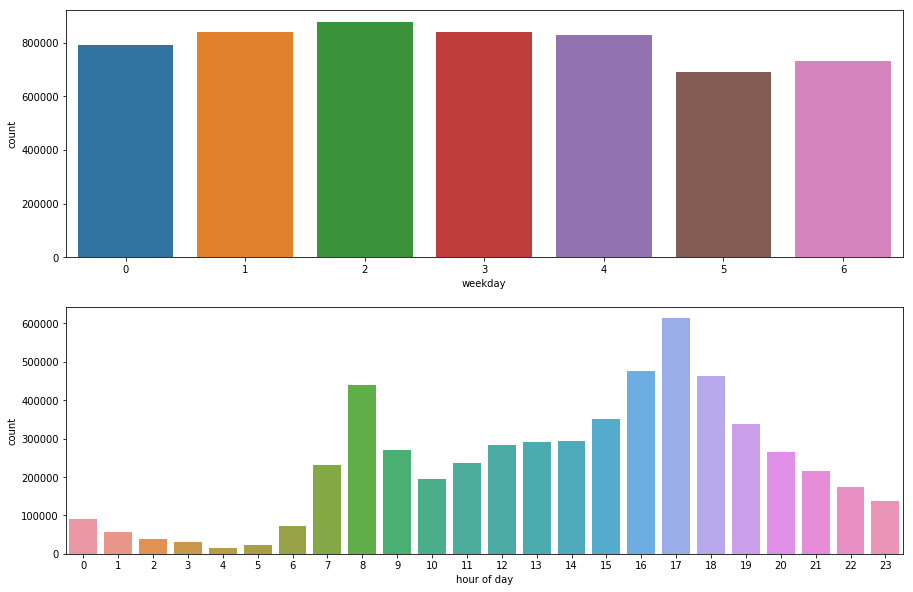

In [38]:
#plot the weekday effect and hourly effect on number of trips
f, axes = plt.subplots(2, 1, figsize=(15,10))
plt.sca(axes[0])
sb.countplot(x='weekday',data=data_2019_weather)

plt.sca(axes[1])
sb.countplot(x='hour', data=data_2019_weather)
plt.xlabel('hour of day')

Text(0.5, 0, 'weather')

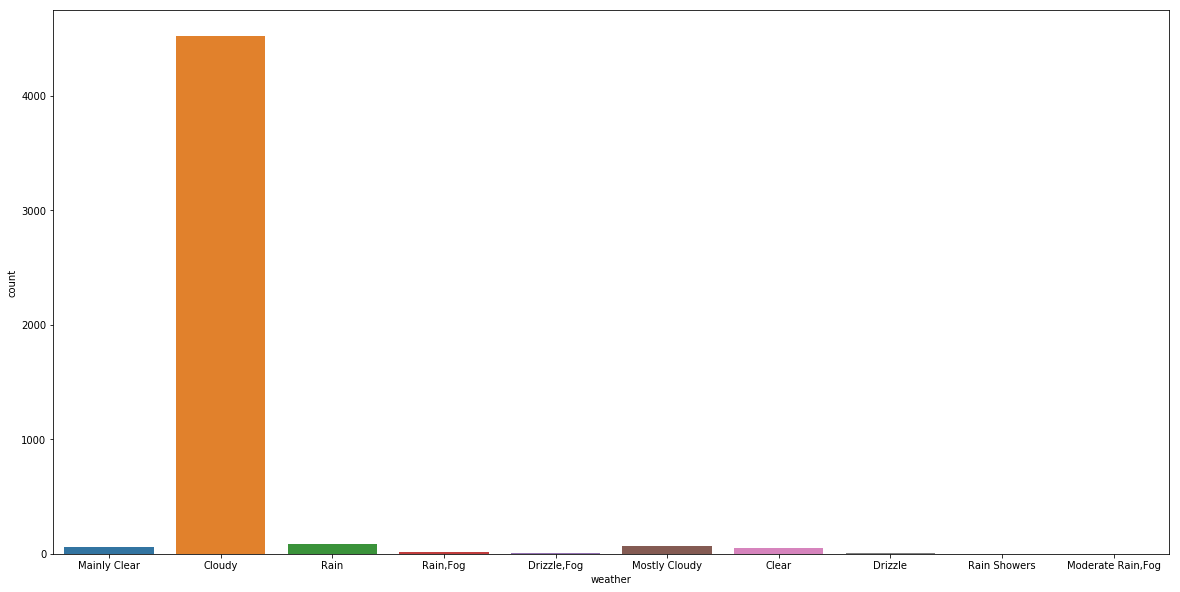

In [53]:
#plot the weather effect on the number of trips
plt.figure(figsize=(20,10))
sb.countplot(x='Weather', data=data_2019_byhour)
plt.xlabel('weather')


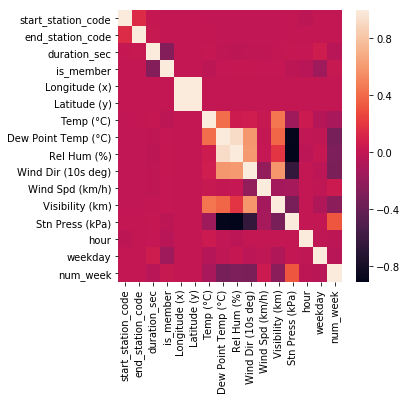

In [55]:
#plot the heatmap to show relative influence of all attributes on each other
plt.figure(figsize=(5,5))
data_filterd = data_2019_weather.drop(['Station Name','Climate ID','Year','Month', 'Day'], axis=1)
corr = data_filterd.corr()
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



-222.55405787116024
[108.62719963 -46.42425047   3.34022169]


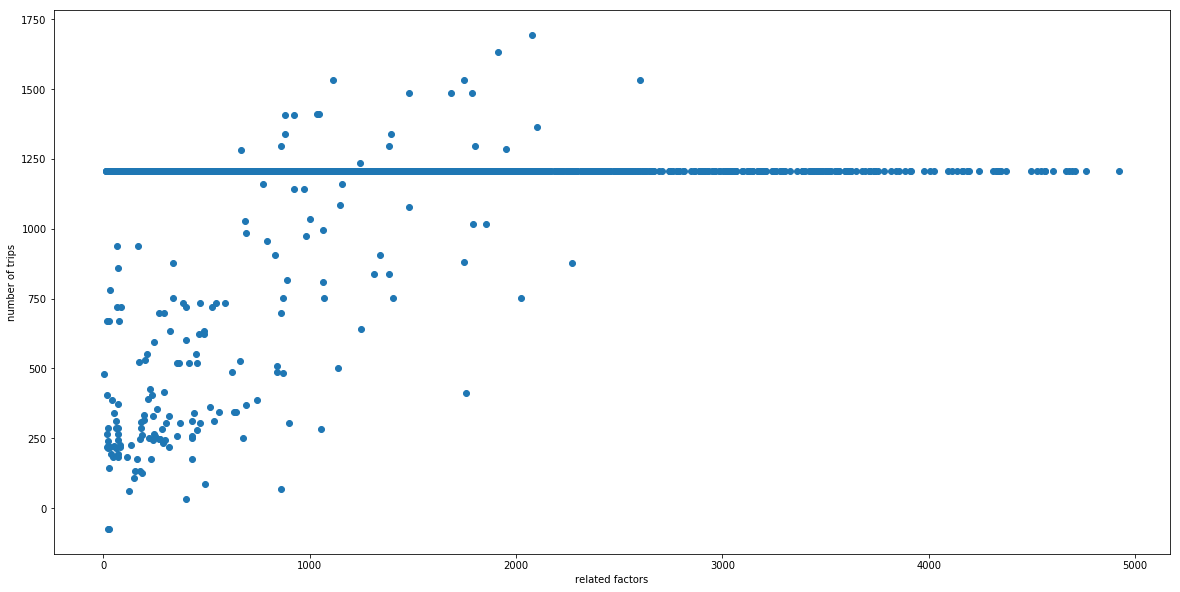

In [66]:
#plot a linear regression graph between ‘temperature’, 
#‘Dew Point Temp’, ‘Wind Spead’ and number of trips
plt.figure(figsize=(20,10))
x = data_2019_byhour[['Temp (°C)','Dew Point Temp (°C)','Wind Spd (km/h)']]
y = data_2019_byhour['num_trips']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('related factors')
plt.ylabel('number of trips')
print(lm.intercept_)
print(lm.coef_)

In [46]:
#now we need to load data from past years to do further analysis
data_2017 = pd.read_csv("/Users/clairehe/Desktop/bixi/OD_2017.csv", encoding="utf-8", low_memory = False)
data_2016 = pd.read_csv("/Users/clairehe/Desktop/bixi/OD_2016.csv", encoding="utf-8", low_memory = False)
data_2015 = pd.read_csv("/Users/clairehe/Desktop/bixi/OD_2015.csv", encoding="utf-8", low_memory = False)
weather_2017 = pd.read_csv("/Users/clairehe/Desktop/bixi/climate2017.csv", encoding="utf-8", low_memory = False)
weather_2016 = pd.read_csv("/Users/clairehe/Desktop/bixi/climate2016.csv", encoding="utf-8", low_memory = False)
weather_2015 = pd.read_csv("/Users/clairehe/Desktop/bixi/climate2015.csv", encoding="utf-8", low_memory = False)

#weather_2017[['Weather']] = weather_2017 [['Weather']].fillna('Cloudy')
weather_2017['Date/Time'] = pd.to_datetime(weather_2017['Date/Time'])
weather_2017['Date/Time'] = weather_2017['Date/Time'].fillna(method='ffill')
weather_2017 = weather_2017.dropna(subset=['Weather'])
weather_2017 = weather_2017.reset_index(drop=True)
data_2017['start_date'] = pd.to_datetime(data_2017['start_date'], errors ='coerce' )
data_2017['start_date'] = data_2017['start_date'].fillna(method='ffill')
data_2017_weather = data_2017.sort_values(by=['start_date'])
data_2017_weather = data_2017_weather.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)
data_2017_weather = pd.merge_asof(data_2017_weather, weather_2017, left_on = 'start_date', right_on = 'Date/Time', direction = 'nearest').drop('Date/Time',axis=1)
data_2017_weather['weekday'] = data_2017_weather.start_date.dt.dayofweek
data_2017_weather['hour'] = data_2017_weather.start_date.dt.hour
data_2017_weather['num_week'] = data_2017_weather.start_date.dt.weekofyear
data_2017_weather = data_2017_weather.drop(['start_date','start_station_code', 'end_date', 'end_station_code', 'duration_sec', 'is_member'], axis=1)
data_2017_byhour = data_2017_weather.groupby(['num_week','weekday','hour']).agg('first')
data_2017_byhour['num_trips'] = data_2017_weather.groupby(['num_week','weekday','hour'])['Weather'].count()
data_2017_byhour = data_2017_byhour.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)

weather_2016[['Weather']] = weather_2016 [['Weather']].fillna('Cloudy')
weather_2016['Date/Time'] = pd.to_datetime(weather_2016['Date/Time'])
weather_2016['Date/Time'] = weather_2016['Date/Time'].fillna(method='ffill')
weather_2016 = weather_2016.dropna(subset=['Weather'])
weather_2016 = weather_2016.reset_index(drop=True)
data_2016['start_date'] = pd.to_datetime(data_2016['start_date'], errors ='coerce' )
data_2016['start_date'] = data_2016['start_date'].fillna(method='ffill')
data_2016_weather = data_2016.sort_values(by=['start_date'])
data_2016_weather = data_2016_weather.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)
data_2016_weather = pd.merge_asof(data_2016_weather, weather_2016, left_on = 'start_date', right_on = 'Date/Time', direction = 'nearest').drop('Date/Time',axis=1)
data_2016_weather['weekday'] = data_2016_weather.start_date.dt.dayofweek
data_2016_weather['hour'] = data_2016_weather.start_date.dt.hour
data_2016_weather['num_week'] = data_2016_weather.start_date.dt.weekofyear
data_2016_weather = data_2016_weather.drop(['start_date','start_station_code', 'end_date', 'end_station_code', 'duration_sec', 'is_member'], axis=1)
data_2016_byhour = data_2016_weather.groupby(['num_week','weekday','hour']).agg('first')
data_2016_byhour['num_trips'] = data_2016_weather.groupby(['num_week','weekday','hour'])['Weather'].count()
data_2016_byhour = data_2016_byhour.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)

weather_2015[['Weather']] = weather_2015 [['Weather']].fillna('Cloudy')
weather_2015['Date/Time'] = pd.to_datetime(weather_2015['Date/Time'])
weather_2015['Date/Time'] = weather_2015['Date/Time'].fillna(method='ffill')
weather_2015 = weather_2015.dropna(subset=['Weather'])
weather_2015 = weather_2015.reset_index(drop=True)
data_2015['start_date'] = pd.to_datetime(data_2015['start_date'], errors ='coerce' )
data_2015['start_date'] = data_2015['start_date'].fillna(method='ffill')
data_2015_weather = data_2015.sort_values(by=['start_date'])
data_2015_weather = data_2015_weather.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)
data_2015_weather = pd.merge_asof(data_2015_weather, weather_2015, left_on = 'start_date', right_on = 'Date/Time', direction = 'nearest').drop('Date/Time',axis=1)
data_2015_weather['weekday'] = data_2015_weather.start_date.dt.dayofweek
data_2015_weather['hour'] = data_2015_weather.start_date.dt.hour
data_2015_weather['num_week'] = data_2015_weather.start_date.dt.weekofyear
data_2015_weather = data_2015_weather.drop(['start_date','start_station_code', 'end_date', 'end_station_code', 'duration_sec', 'is_member'], axis=1)
data_2015_byhour = data_2015_weather.groupby(['num_week','weekday','hour']).agg('first')
data_2015_byhour['num_trips'] = data_2015_weather.groupby(['num_week','weekday','hour'])['Weather'].count()
data_2015_byhour = data_2015_byhour.dropna(axis=1,how='any', thresh=None,subset=None,inplace=False)


In [47]:
#create dynamic regressor for test data
x = []
y = []


ahead = 24 #24 hours forecast
for input_data in [data_2019_byhour]:
    for k in range(720,input_data.shape[0]-24):
        x.append(np.hstack((
                input_data['num_trips'].values[k-720:k-1], 
                input_data['Visibility (km)'].values[k-24:k+24],    
                input_data['Wind Spd (km/h)'].values[k-24:k+24],   
                input_data['Dew Point Temp (°C)'].values[k-24:k+24],
                input_data['Temp (°C)'].values[k-24:k+24],       
                1                     
            )).tolist()  )
        y.append(input_data['num_trips'].values[k+ahead].tolist() )

x = np.array(x)
y = np.array(y)

#load the past data
x_past = []
y_past = []

                #input_data['Weather'].values[k-24:k+24],           # last month usage

ahead = 24 #24 hours forecast
for input_data in [data_2017_byhour,data_2016_byhour,data_2015_byhour]:
    for k in range(720,input_data.shape[0]-24):
        x_past.append(np.hstack((
                input_data['num_trips'].values[k-720:k-1],           # last month usage
                input_data['Visibility (km)'].values[k-24:k+24],    
                input_data['Wind Spd (km/h)'].values[k-24:k+24],   
                input_data['Dew Point Temp (°C)'].values[k-24:k+24],
                input_data['Temp (°C)'].values[k-24:k+24],                   
                1                     
            )).tolist()  )
        y_past.append(input_data['num_trips'].values[k+ahead].tolist() )

x_past = np.array(x_past)
y_past = np.array(y_past)


In [48]:
#use minmaxscaler to scale each feature to a given range
min_max_scaler = preprocessing.MinMaxScaler()
normalized_x = min_max_scaler.fit_transform(x)
normalized_x_past = min_max_scaler.fit_transform(x_past)

normalized_y = min_max_scaler.fit_transform(y.reshape(-1,1))
normalized_y_past = min_max_scaler.fit_transform(y_past.reshape(-1,1))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Mean squared error is : 0.014231055408220677
the fitness is : 0.6518769447069415


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


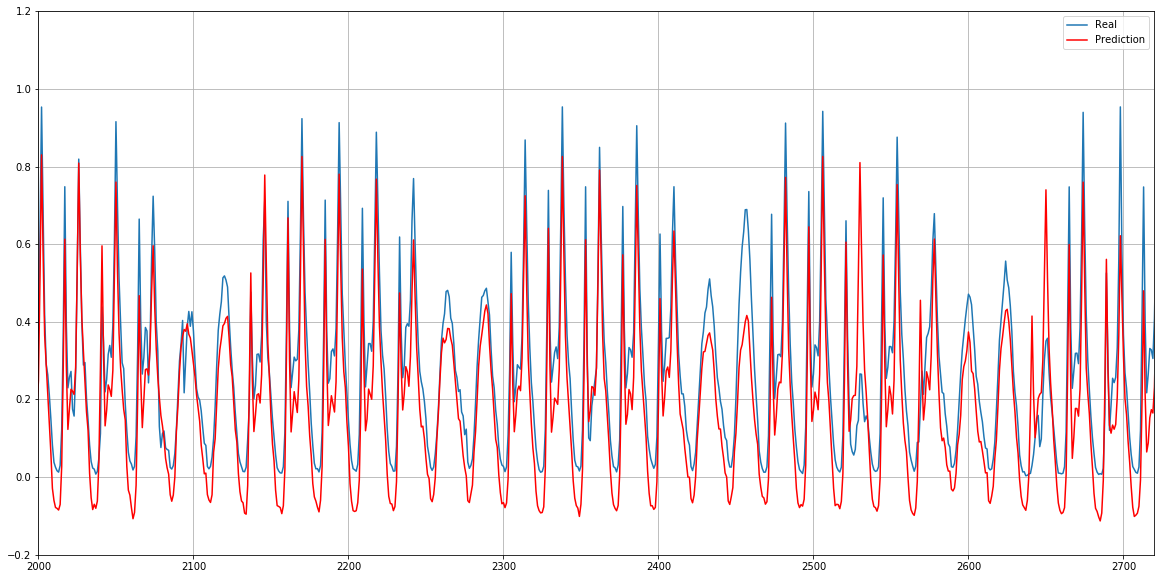

In [57]:
#apply clf ridge to estimate and predict future trend
clf = linear_model.Ridge (alpha = 1);
clf.fit(normalized_x_past,normalized_y_past);
predict = clf.predict(normalized_x);
score = clf.score(normalized_x,normalized_y)
print('Mean squared error is : {}' .format(mean_squared_error(normalized_y, predict)));
print('the fitness is : {}' .format(score))

plt.figure(figsize=(20,10))
plt.plot(normalized_y);
plt.plot(predict,'r');
plt.grid('on');
plt.legend(['Real',u'Prediction']);
plt.axis(xmin=2000,xmax=2720,ymin=-.2,ymax=1.2);
